<a href="https://colab.research.google.com/github/rhilderbrand/MSDS-422-MachineLearning/blob/main/Hilderbrand_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analyzing Boston Housing Data

In [1]:
# Import base packages into the namespace for this program & # modeling routines from Scikit Learn packages

%matplotlib inline
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt  # static plotting
import numpy as np               # arrays and math functions
import os
import pandas as pd              # data frame operations 
from pandas.plotting import scatter_matrix
import pylab as pl
import seaborn as sns            # pretty plotting, including heat map
import sklearn
import sklearn.linear_model
from math import sqrt
from sklearn import linear_model
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import KFold 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Decision Trees
# from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz, DecisionTreeRegressor
from IPython.display import Image
# from sklearn.cross_validation import ShuffleSplit

from decimal import Decimal

In [2]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# although we standardize X and y variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True

In [3]:
#S2 Mount Google Drive to Colab Enviorment
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
#S3 Establish working directory
import os # Operation System
os.getcwd()
%cd /content/gdrive/My Drive/Colab Notebooks/Week 4/
!pwd
!ls
print('Working Directory')
print(os.getcwd())

/content/gdrive/My Drive/Colab Notebooks/Week 4
/content/gdrive/My Drive/Colab Notebooks/Week 4
Assignment4_GettingStarted.ipynb  boston.csv  Hilderbrand_Assignment_4
Working Directory
/content/gdrive/My Drive/Colab Notebooks/Week 4


In [5]:
# Load data
work_dir = " /content/gdrive/My Drive/Colab Notebooks/Week 4/"
boston_input = pd.read_csv('boston.csv')

In [6]:
# print the first five rows
boston_input.head()

,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,Nahant,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,Swampscott,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,Swanpscott,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,Marblehead,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,Marblehead,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [7]:
# print the last five rows
boston_input.tail()

,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
501,Winthrop,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,Winthrop,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,Winthrop,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,Winthrop,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0
505,Winthrop,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,19.0


In [8]:
# look at data types
boston_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   neighborhood  506 non-null    object 
 1   crim          506 non-null    float64
 2   zn            506 non-null    float64
 3   indus         506 non-null    float64
 4   chas          506 non-null    int64  
 5   nox           506 non-null    float64
 6   rooms         506 non-null    float64
 7   age           506 non-null    float64
 8   dis           506 non-null    float64
 9   rad           506 non-null    int64  
 10  tax           506 non-null    int64  
 11  ptratio       506 non-null    float64
 12  lstat         506 non-null    float64
 13  mv            506 non-null    float64
dtypes: float64(10), int64(3), object(1)
memory usage: 55.5+ KB


In [9]:
# check for null values
boston_input.isnull().sum()

neighborhood    0
crim            0
zn              0
indus           0
chas            0
nox             0
rooms           0
age             0
dis             0
rad             0
tax             0
ptratio         0
lstat           0
mv              0
dtype: int64

In [10]:
# Generate descriptive statistics summarizing the central tendency, dispersion and shape of the neighborhood feature.
boston_input['neighborhood'].describe()

count           506
unique           93
top       Cambridge
freq             30
Name: neighborhood, dtype: object

In [11]:
# Display unique neighborhoods
boston_input['neighborhood'].unique()

array(['Nahant', 'Swampscott', 'Swanpscott', 'Marblehead', 'Salem',
       'Lynn', 'Saugus', 'Lynnfield', 'Peabody', 'Danvers', 'Middleton',
       'Topsfield', 'Hamilton', 'Wenham', 'Beverly', 'Manchester',
       'North_Reading', 'Wilmington', 'Burlington', 'Woburn', 'Reading',
       'Wakefield', 'Melrose', 'Stoneham', 'Winchester', 'Medford',
       'Malden', 'Everett', 'Somerville', 'Cambridge', 'Arlington',
       'Belmont', 'Lexington', 'Bedford', 'Lincoln', 'Concord', 'Sudbury',
       'Wayland', 'Weston', 'Waltham', 'Watertown', 'Newton', 'Natick',
       'Framingham', 'Ashland', 'Sherborn', 'Brookline', 'Dedham',
       'Needham', 'Wellesley', 'Dover', 'Medfield', 'Millis', 'Norfolk',
       'Walpole', 'Westwood', 'Norwood', 'Sharon', 'Canton', 'Milton',
       'Quincy', 'Braintree', 'Randolph', 'Holbrook', 'Weymouth',
       'Cohasset', 'Hull', 'Hingham', 'Rockland', 'Hanover', 'Norwell',
       'Scituate', 'Marshfield', 'Duxbury', 'Pembroke',
       'Allston-Brighton', 'Bac

In [12]:
# Examine the top 5 & bottom 5 neighborhoods by the response variable "mv"

top_5 = boston_input[['mv','neighborhood']]
top_5 = top_5.groupby('neighborhood').mean()
top_5 = top_5.sort_values('mv', ascending = False)
print('\nTop 5 Neighborhoods:\n= = = = = = = = = = = = =')
print(top_5.head(5))
print('\nBottom 5 Neighborhoods:\n= = = = = = = = = = = = =')
print(top_5.tail(5))
# print('\nTop 5 Neighborhoods:\n= = = = = = = = = = = = =', top_5.head(5))
# print('\nBottom 5 Neighborhoods:\n= = = = = = = = = = = = =', top_5.tail(5))


Top 5 Neighborhoods:
= = = = = = = = = = = = =
                 mv
neighborhood       
Lincoln       50.00
Beacon_Hill   50.00
Dover         50.00
Weston        49.25
Sherborn      44.00

Bottom 5 Neighborhoods:
= = = = = = = = = = = = =
                     mv
neighborhood           
Chelsea       12.800000
Charlestown   12.400000
Roxbury       11.615789
East_Boston   11.563636
South_Boston   9.123077


In [13]:
boston_input.describe()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.528854
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.182176
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [14]:
# drop the neighborhood column from the data frame
boston_input = boston_input.drop('neighborhood', 1)

In [15]:
# check data frame info to ensure neighborhood column was dropped
boston_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rooms    506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  mv       506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


##Exploratory Data Analysis

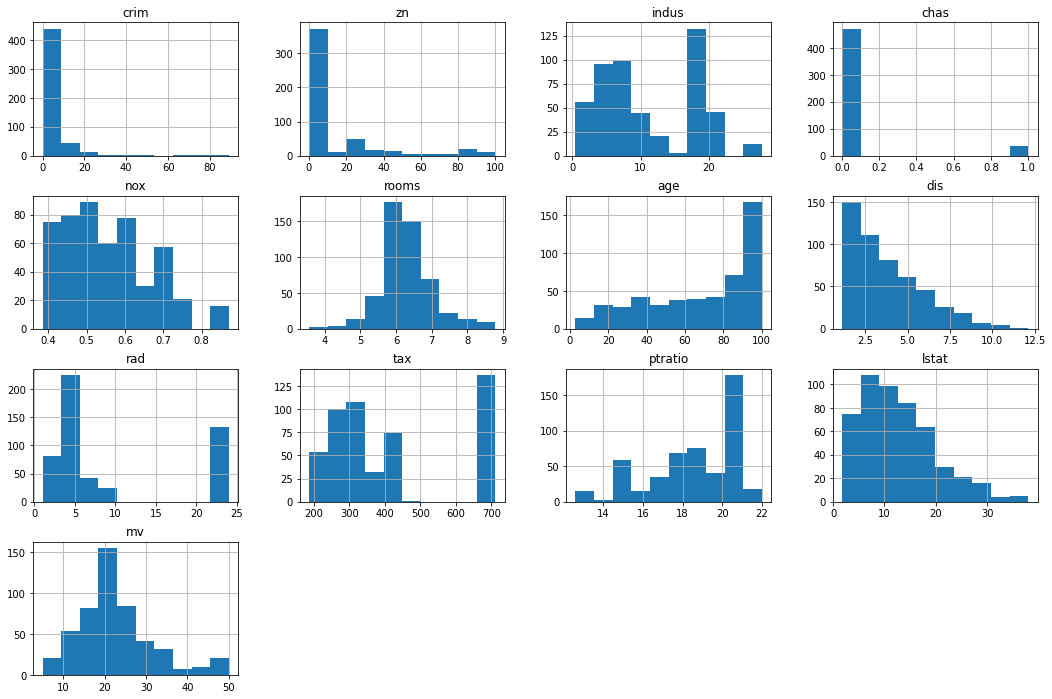

In [16]:
# Check distributions of non-categorical variables for boston housing by histogram
boston_input.hist(figsize=(18,12))
plt.show('plot-histogram-boston')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


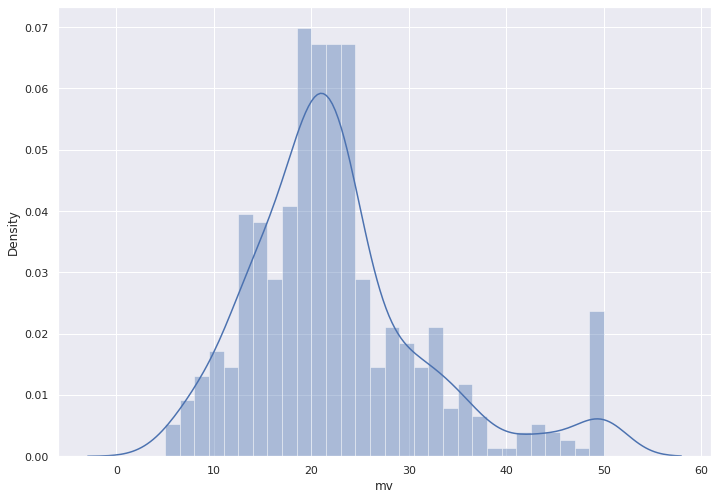

In [17]:
# distribution of target variable mv
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston_input['mv'], bins=30)
plt.show()

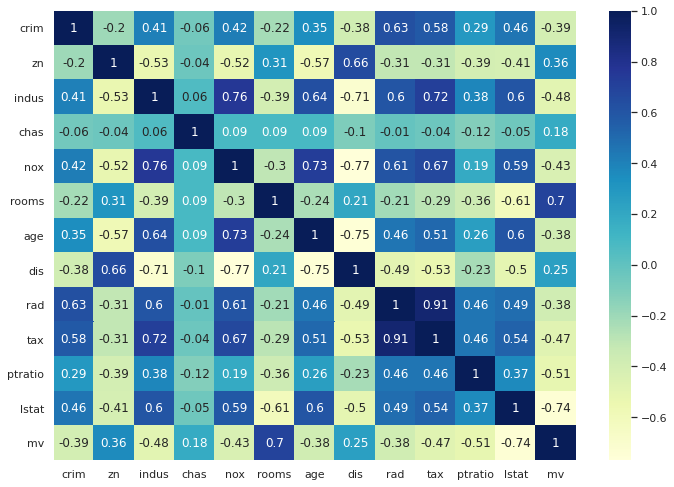

In [18]:
# create a correlation heat map
correlation_matrix = boston_input.corr().round(2)
sns.heatmap(data=correlation_matrix, cmap="YlGnBu" , annot=True)

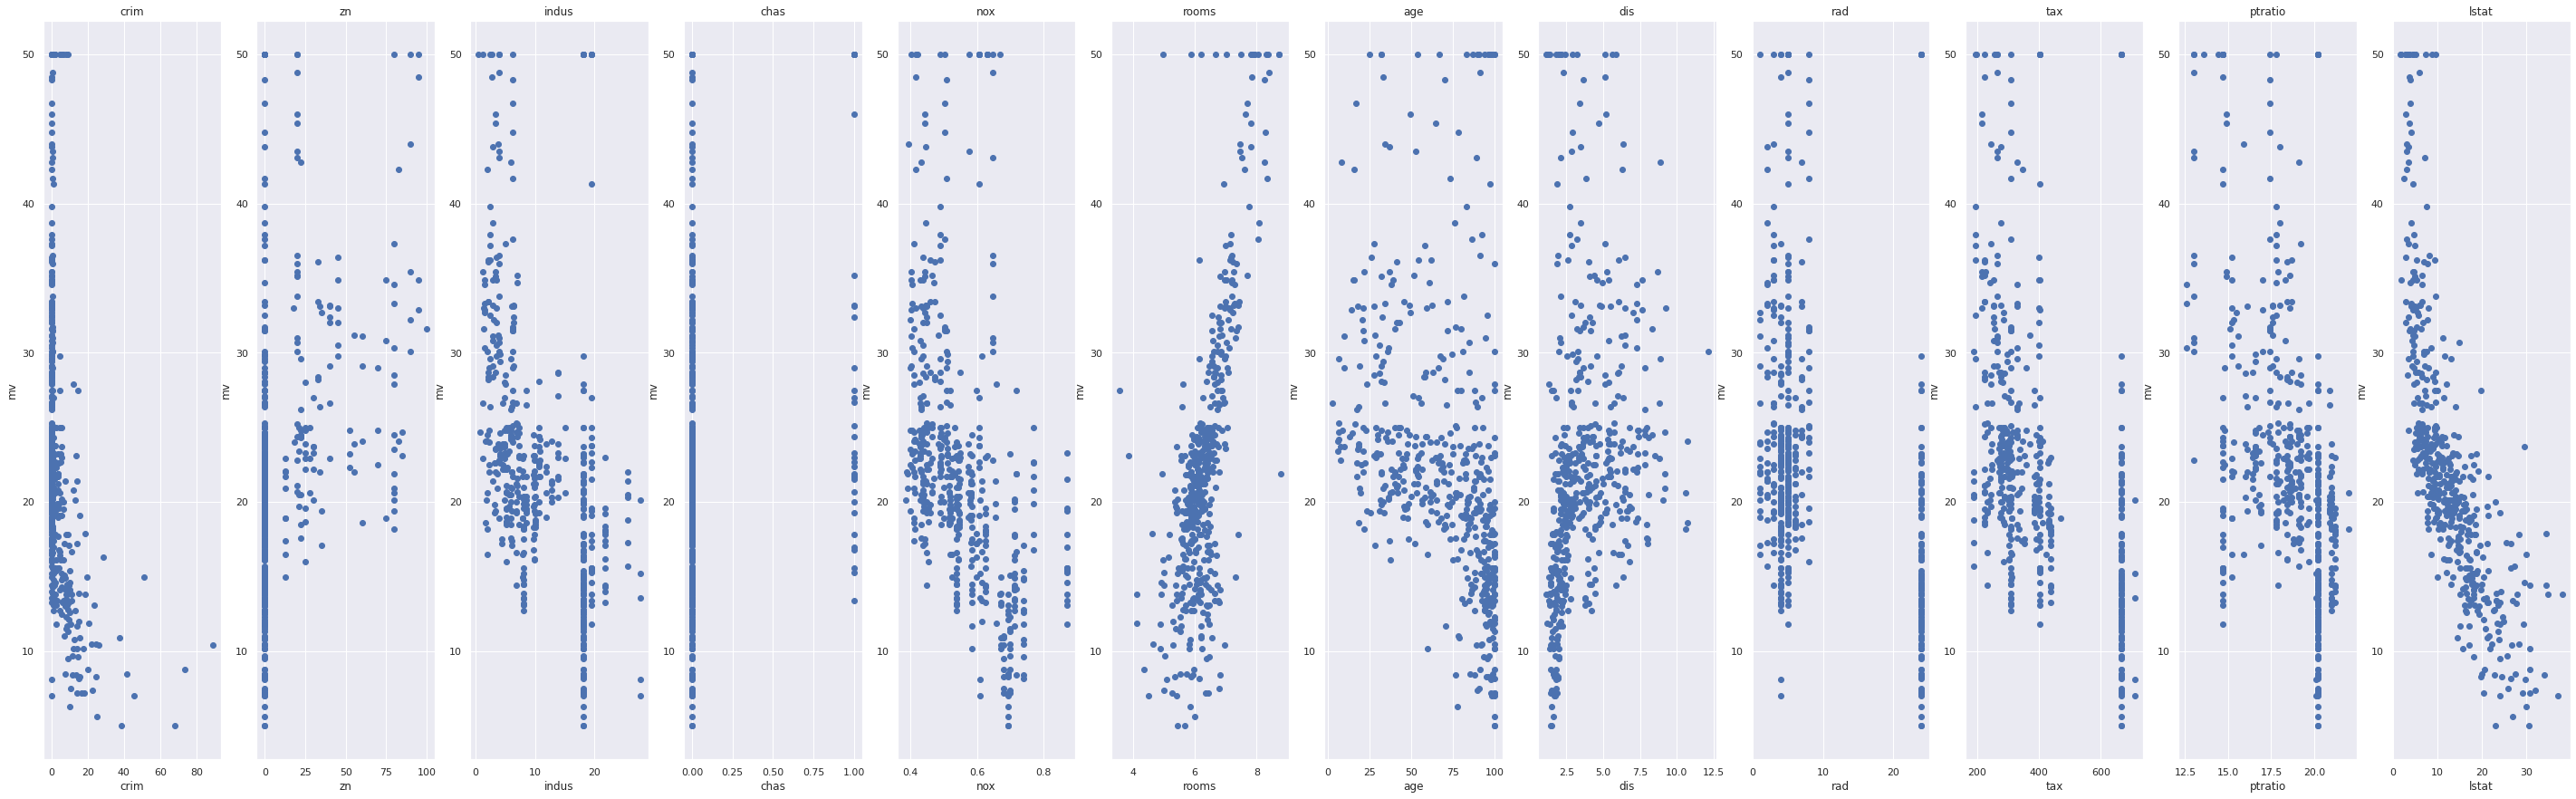

In [19]:
plt.figure(figsize=(50, 15))

features = ['crim', 'zn','indus','chas','nox','rooms','age','dis','rad','tax','ptratio','lstat']
target = boston_input['mv']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston_input[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('mv')

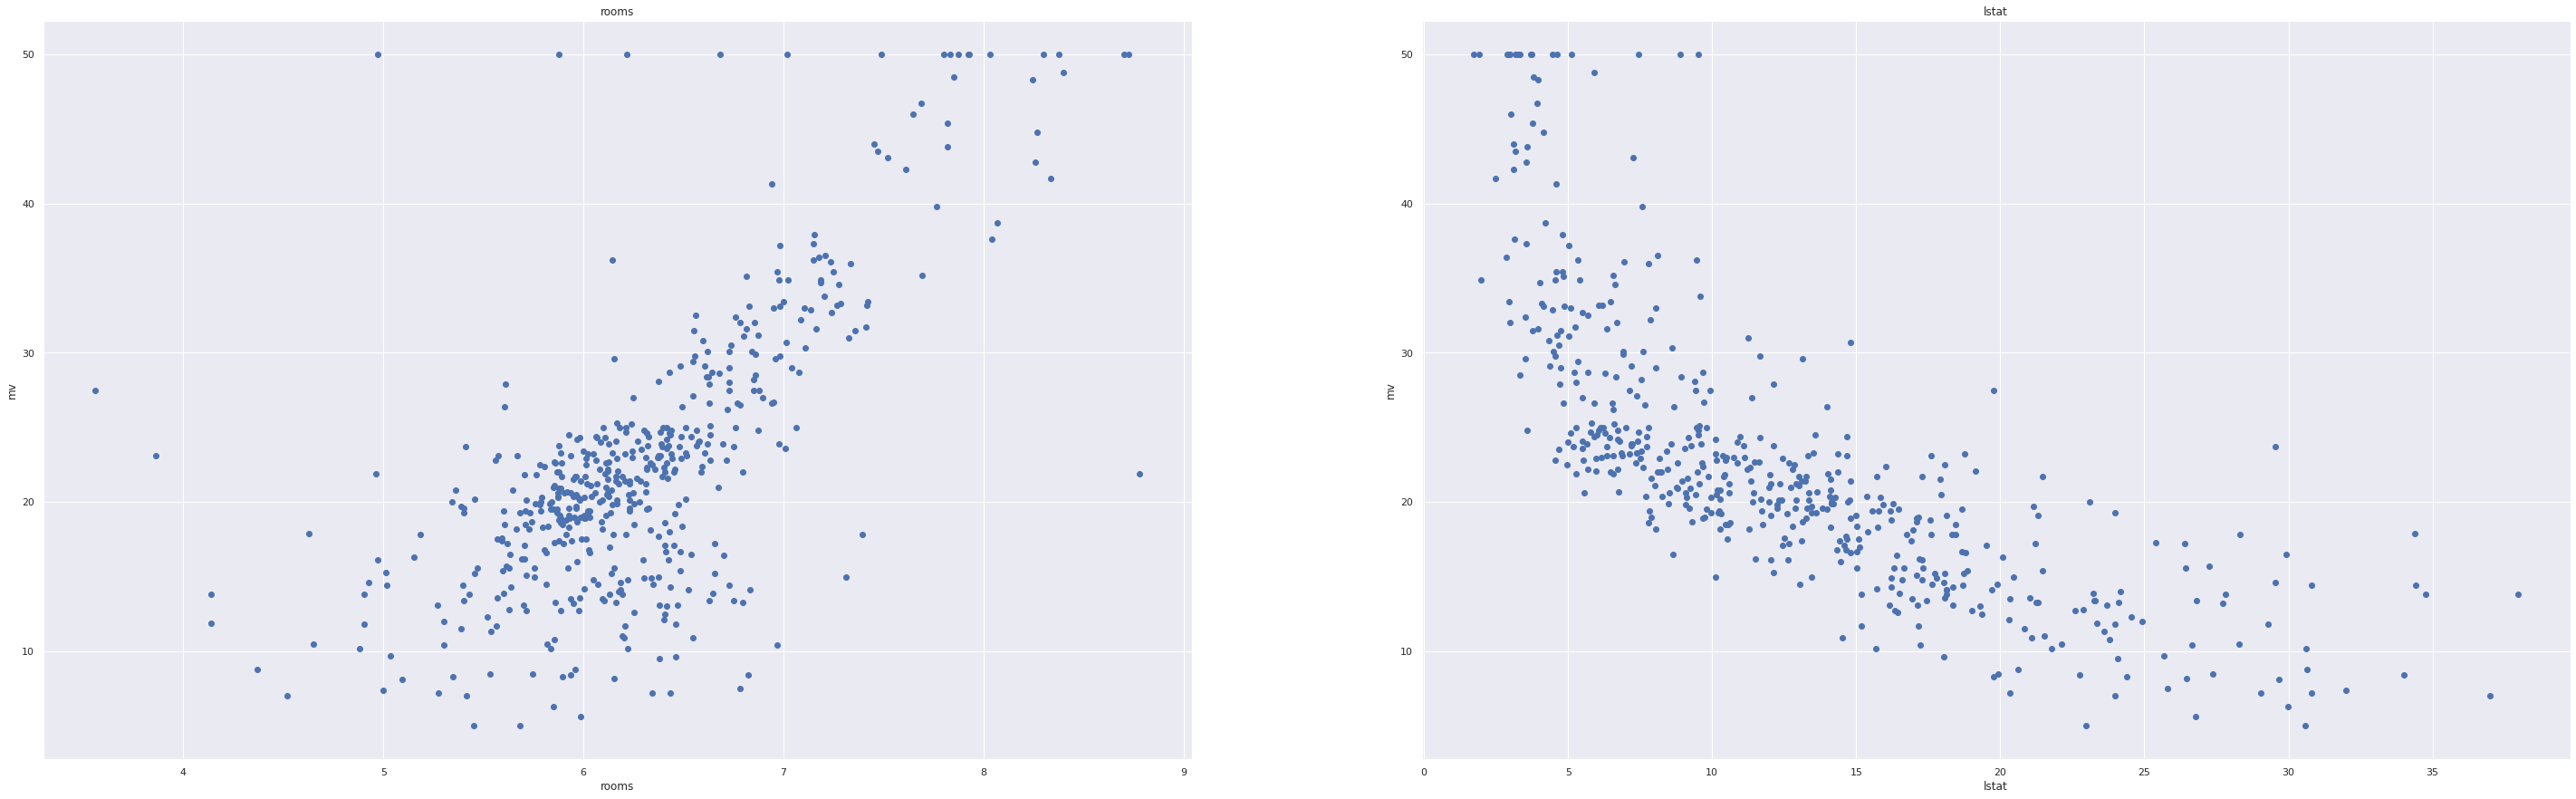

In [20]:
# zoom in on lstat and rooms
plt.figure(figsize=(50, 15))

features = ['rooms','lstat']
target = boston_input['mv']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston_input[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('mv')

##Prepare Data for Training Model

In [21]:
# Initializing the X and Y variables
import math
X = boston_input[['crim','zn','indus','chas','nox','rooms','age','dis','rad','tax','ptratio','lstat']]
y = boston_input['mv']
feature_cols = ['crim','zn','indus','chas','nox','rooms','age','dis','rad','tax','ptratio','lstat']

# Splitting the boston dataframe into train and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=1337)
# print(X_train.head(5))
# print(y.head(5))

# Log transformation of target variable
y_log = np.log(boston_input['mv'])
# print(y_log.head(5))

# Splitting the boston dataframe into train and test sets accounting for the log transformation of the Target Variable
X_train, X_test, y_log_train, y_log_test = model_selection.train_test_split(X, y_log, test_size=0.33, random_state=1337)
# print(X_train.head(5))

In [22]:
# Normalizing the data set using the MinMaxScaler transformation 

scaler = preprocessing.MinMaxScaler()
# scaler.fit(X_train)

# X_train_norm = scaler.transform(X_train)
X_train_norm = scaler.fit_transform(X_train)   # This line is a combination of the 2 lines above
X_test_norm = scaler.transform(X_test)
# X_norm = scaler.fit_transform(X)

pd.DataFrame(data=X_train_norm, columns=X_train.columns).describe()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,0.039520,0.105354,0.399063,0.073746,0.357143,0.531510,0.666497,0.272184,0.368988,0.421434,0.613946,0.327926
std,0.091874,0.222944,0.255219,0.261744,0.242499,0.135374,0.300365,0.219674,0.373885,0.321101,0.234487,0.211553
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000890,0.000000,0.173387,0.000000,0.150206,0.453918,0.398188,0.098773,0.130435,0.176864,0.468085,0.151483
50%,0.003071,0.000000,0.338343,0.000000,0.314815,0.518763,0.766525,0.204537,0.173913,0.271511,0.680851,0.292070
75%,0.039851,0.125000,0.646628,0.000000,0.491770,0.595081,0.940299,0.418971,1.000000,0.913958,0.808511,0.460654
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
# MinMaxScaler to normalize the entire dataset
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_norm = scaler.transform(X)

pd.DataFrame(data=X_norm, columns=X.columns).describe()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,0.391378,0.069170,0.349167,0.529581,0.664978,0.278472,0.371713,0.421104,0.622929,0.330601
std,0.096679,0.233225,0.251479,0.253994,0.238431,0.136616,0.300094,0.223738,0.378576,0.322251,0.230313,0.216134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.035181,-0.004739,0.000000,-0.001912,0.000000,0.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.451974,0.413913,0.098388,0.130435,0.173996,0.510638,0.157990
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.514777,0.760128,0.216039,0.173913,0.271511,0.686170,0.291465
75%,0.041258,0.125000,0.646628,0.000000,0.491770,0.595470,0.936834,0.426523,1.000000,0.913958,0.808511,0.460805
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.014777,1.000000,1.163715,1.000000,1.000000,1.000000,1.096852


###### Normalizing all Features to the same Magnitude Using MinMaxScaler
From the output of the MinMaxScaler above, the mean represents the interest level.
It should be noted that most of the times, features in datasets vary highly in magnitudes, units and range. Given that most of the machine learning algorithms use the Eucledian distance between two datapoints in their computation, the varying magnitudes, units and range of the features pose a problem where by the ML algorithms would take into account only the magnitudes ignoring the units. As a result, features with high magnitudes would weigh alot more in the Eucladian distance calculations than those with low magnitudes.
As a mitigation step, all the features were normalized to the same magnitude level using the MinMaxScaler in SciKit package.

THOUGHTS ON THE ABOVE ?

In [24]:
# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([boston_input.mv,\
    boston_input.crim,\
    boston_input.zn,\
    boston_input.indus,\
    boston_input.chas,\
    boston_input.nox,\
    boston_input.rooms,\
    boston_input.age,\
    boston_input.dis,\
    boston_input.rad,\
    boston_input.tax,\
    boston_input.ptratio,\
    boston_input.lstat]).T

In [25]:
# HOW ABOUT USING STANDARD SCALAR

# standard scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(prelim_model_data))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [26]:
# show standardization constants being employed
print(scaler.mean_)
print(scaler.scale_)

[2.25288538e+01 3.61352356e+00 1.13636364e+01 1.11367787e+01
 6.91699605e-02 5.54695059e-01 6.28463439e+00 6.85749012e+01
 3.79504269e+00 9.54940711e+00 4.08237154e+02 1.84555336e+01
 1.26530632e+01]
[9.17309810e+00 8.59304135e+00 2.32993957e+01 6.85357058e+00
 2.53742935e-01 1.15763115e-01 7.01922514e-01 2.81210326e+01
 2.10362836e+00 8.69865112e+00 1.68370495e+02 2.16280519e+00
 7.13400164e+00]


In [27]:
# the model data will be standardized form of preliminary model data
model_data = scaler.fit_transform(prelim_model_data)

In [28]:
# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('\nData dimensions:', prelim_model_data.shape)


Data dimensions: (506, 13)


##Run Models with K-fold CV

In [29]:
names = ['Linear_Regression', 'Ridge_Regression', 'Lasso_Regression', 
         'Decision_Tree', 
         'Random_Forest_Regression', 
         'Gradient_Boost'] 
regressors = [LinearRegression(), Ridge(alpha=0.1, solver = "cholesky"),Lasso(alpha=0.1),
              DecisionTreeRegressor(random_state=42, max_depth=5),
              RandomForestRegressor(max_depth=4, random_state=42, n_estimators=100),
              GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)]

In [30]:
# ten-fold cross-validation employed here
N_FOLDS = 10

# set up numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))

kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)

# check the splitting process by looking at fold observation counts
index_for_fold = 0  # fold count initialized

for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold,
          '------------------------------------------')
#   note that 0:model_data.shape[1]-1 slices for explanatory variables
#   and model_data.shape[1]-1 is the index for the response variable    
    X_train = model_data[train_index, 0:model_data.shape[1]-1]
    X_test = model_data[test_index, 0:model_data.shape[1]-1]
    y_train = model_data[train_index, model_data.shape[1]-1]
    y_test = model_data[test_index, model_data.shape[1]-1]   

    print('\nShape of input data for this fold:',
          '\nData Set: (Observations, Variables)')
    print('X_train:', X_train.shape)
    print('X_test:',X_test.shape)
    print('y_train:', y_train.shape)
    print('y_test:',y_test.shape)

    index_for_method = 0  # initialize

    for name, clf in zip(names, regressors):
        print('\nRegressor evaluation for:', name)
        print('  Scikit Learn method:', clf)
        clf.fit(X_train, y_train)  # fit on the train set for this fold
        # evaluate on the test set for this fold
        y_test_predict = clf.predict(X_test)
        fold_method_result = mean_squared_error(y_test, y_test_predict) 
        print('RMSE:', fold_method_result)
        cv_results[index_for_fold, index_for_method] = fold_method_result

        index_for_method += 1

    index_for_fold += 1

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names

print('\n----------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      '\nMethod                 Root mean-squared error', sep = '')     
print(cv_results_df.mean())


Fold index: 0 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (455, 12)
X_test: (51, 12)
y_train: (455,)
y_test: (51,)

Regressor evaluation for: Linear_Regression
  Scikit Learn method: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
RMSE: 0.37863191551282716

Regressor evaluation for: Ridge_Regression
  Scikit Learn method: Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='cholesky', tol=0.001)
RMSE: 0.3787203036268526

Regressor evaluation for: Lasso_Regression
  Scikit Learn method: Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
RMSE: 0.40016425800081057

Regressor evaluation for: Decision_Tree
  Scikit Learn method: DecisionTreeRegressor(ccp_alpha=0.0, criterion

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RMSE: 0.3245214926774805

Regressor evaluation for: Gradient_Boost
  Scikit Learn method: GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=120,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
RMSE: 0.3177367791341709

Fold index: 1 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (455, 12)
X_test: (51, 12)
y_train: (455,)
y_test: (51,)

Regressor evaluation fo

In [31]:
# RandomForestRegressor default settings used with two exceptions
#     n_estimators = 100, (increase size for more stable estimators)
#     max_features = 'sqrt' (subset of features included in each tree,
#                             with 12 features sqrt(12) = 3.464 -> 3 in each tree)
#     max_features = 'log2' (ln(12)/ln(2) = 2.485/0.693 = 3.585 -> 3 in each tree
#                            given that the algorithm truncates)
#     min_impurity_split = 0.01

In [32]:
reg_model = RandomForestRegressor(n_estimators=100, max_features='sqrt',min_impurity_decrease=0.01)
reg_model.fit(X_train, y_train)

# model evaluation for training set
y_pred_train = reg_model.predict(X_train)
rmse_train = (np.sqrt(mean_squared_error(y_train, y_pred_train)))
r2_train = r2_score(y_train, y_pred_train)

print("The model performance for training set:")
print('RMSE is {}'.format(rmse_train))
print('R2 score is {}'.format(r2_train))
print("\n")

# model evaluation for testing set
y_pred_test = reg_model.predict(X_test)
rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred_test)))
r2_test = r2_score(y_test, y_pred_test)

print("The model performance for testing set:")
print('RMSE is {}'.format(rmse_test))
print('R2 score is {}'.format(r2_test)) 

The model performance for training set:
RMSE is 0.4350183049687687
R2 score is 0.8193010764213515


The model performance for testing set:
RMSE is 0.4287431205953792
R2 score is 0.6043151559544062


In [33]:
# ----------------------------------------------------------
# Random forests is the best model of those examined
# In particular, we see that having a maximum of 7
# explanatory variables in each tree is best for this study.


reg_model.fit(X_train, y_train)  # fit on the train set for this fold
print('\n---------------------------------------------------------------------------')
print('Random Forests Regression Model Explanatory Variable Importance Results')
var_name = [    
    'crim',
    'zn',
    'indus',
    'chas',
    'nox',
    'rooms',
    'age',
    'dis',
    'rad',
    'tax',
    'ptratio',
    'lstat']
var_description = [  
    'Crime rate',
    'Percentage of land zoned for lots',
    'Percentage of business that is industrial or nonretail',
    'On the Charles River (1) or not (0)',
    'Air pollution (nitrogen oxide concentration)',
    'Average number of rooms per home',
    'Percentage of homes built before 1940',
    'Weighted distance to employment centers',
    'Accessibility to radial highways',
    'Tax rate',
    'Pupil/teacher ratio in public schools',
    'Percentage of population of lower socio-economic status']
var_importance = reg_model.feature_importances_
final_model_results = pd.DataFrame({'name': var_name,
                                    'description': var_description,
                                    'importance': var_importance})
    
print(final_model_results)     


---------------------------------------------------------------------------
Random Forests Regression Model Explanatory Variable Importance Results
       name                                        description  importance
0      crim                                         Crime rate    0.329152
1        zn                  Percentage of land zoned for lots    0.091542
2     indus  Percentage of business that is industrial or n...    0.004033
3      chas                On the Charles River (1) or not (0)    0.086680
4       nox       Air pollution (nitrogen oxide concentration)    0.004772
5     rooms                   Average number of rooms per home    0.082788
6       age              Percentage of homes built before 1940    0.124536
7       dis            Weighted distance to employment centers    0.138059
8       rad                   Accessibility to radial highways    0.075965
9       tax                                           Tax rate    0.016584
10  ptratio              P

##Summary